In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os
import glob
import numpy as np
import pandas as pnd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import cv2
from concurrent import futures
import threading
import matplotlib.pyplot as mplt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import datetime
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import numpy as np
from tqdm import tqdm
import shutil
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

init_notebook_mode(connected=True)
RANDOM_SEED = 123

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import system libs
import os
import time
import pathlib
import itertools
from PIL import Image

# import data handling tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization


# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import the display and Image classes from IPython.display
from IPython.display import display, Image

# Display an image using the display function
# Specify the file path of the image using the 'filename' parameter
# Note: Make sure to replace '/content/drive/MyDrive/artificial_intelligence_dataset/train/malignant/1500.jpg' with the actual path to your image file
display(Image(filename='/content/drive/MyDrive/artificial_intelligence_dataset/train/malignant/1500.jpg'))


In [ ]:
# Import necessary libraries
import os
import pandas as pd

# Set the directory path where the training data is located
train_data_dir = '/content/drive/MyDrive/artificial_intelligence_dataset/train'

# Initialize empty lists to store file paths and corresponding labels
filepaths = []
labels = []

# List all folders (labels) in the specified directory
folds = os.listdir(train_data_dir)

# Iterate through each folder (label) in the directory
for fold in folds:
    # Construct the full path for the current folder
    foldpath = os.path.join(train_data_dir, fold)

    # List all files in the current folder
    filelist = os.listdir(foldpath)

    # Iterate through each file in the folder
    for file in filelist:
        # Construct the full file path
        fpath = os.path.join(foldpath, file)

        # Append the file path and label to the respective lists
        filepaths.append(fpath)
        labels.append(fold)

# Create Pandas Series for file paths and labels
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')

# Concatenate the two Series into a single DataFrame
train_df = pd.concat([Fseries, Lseries], axis=1)


In [ ]:
# Import necessary libraries
import os
import pandas as pd

# Set the directory path where the test data is located
test_data_dir = '/content/drive/MyDrive/artificial_intelligence_dataset/test'

# Initialize empty lists to store file paths and corresponding labels
filepaths = []
labels = []

# List all folders (labels) in the specified test data directory
folds = os.listdir(test_data_dir)

# Iterate through each folder (label) in the test data directory
for fold in folds:
    # Construct the full path for the current folder in the test set
    foldpath = os.path.join(test_data_dir, fold)

    # List all files in the current folder in the test set
    filelist = os.listdir(foldpath)

    # Iterate through each file in the folder
    for file in filelist:
        # Construct the full file path
        fpath = os.path.join(foldpath, file)

        # Append the file path and label to the respective lists
        filepaths.append(fpath)
        labels.append(fold)

# Create Pandas Series for file paths and labels for the test set
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')

# Concatenate the two Series into a single DataFrame for the test set
test_df = pd.concat([Fseries, Lseries], axis=1)


In [ ]:
# crobed image size
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels',
                                       target_size= img_size, class_mode= 'categorical',
                                       color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels',
                                      target_size= img_size, class_mode= 'categorical',
                                      color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 2639 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.


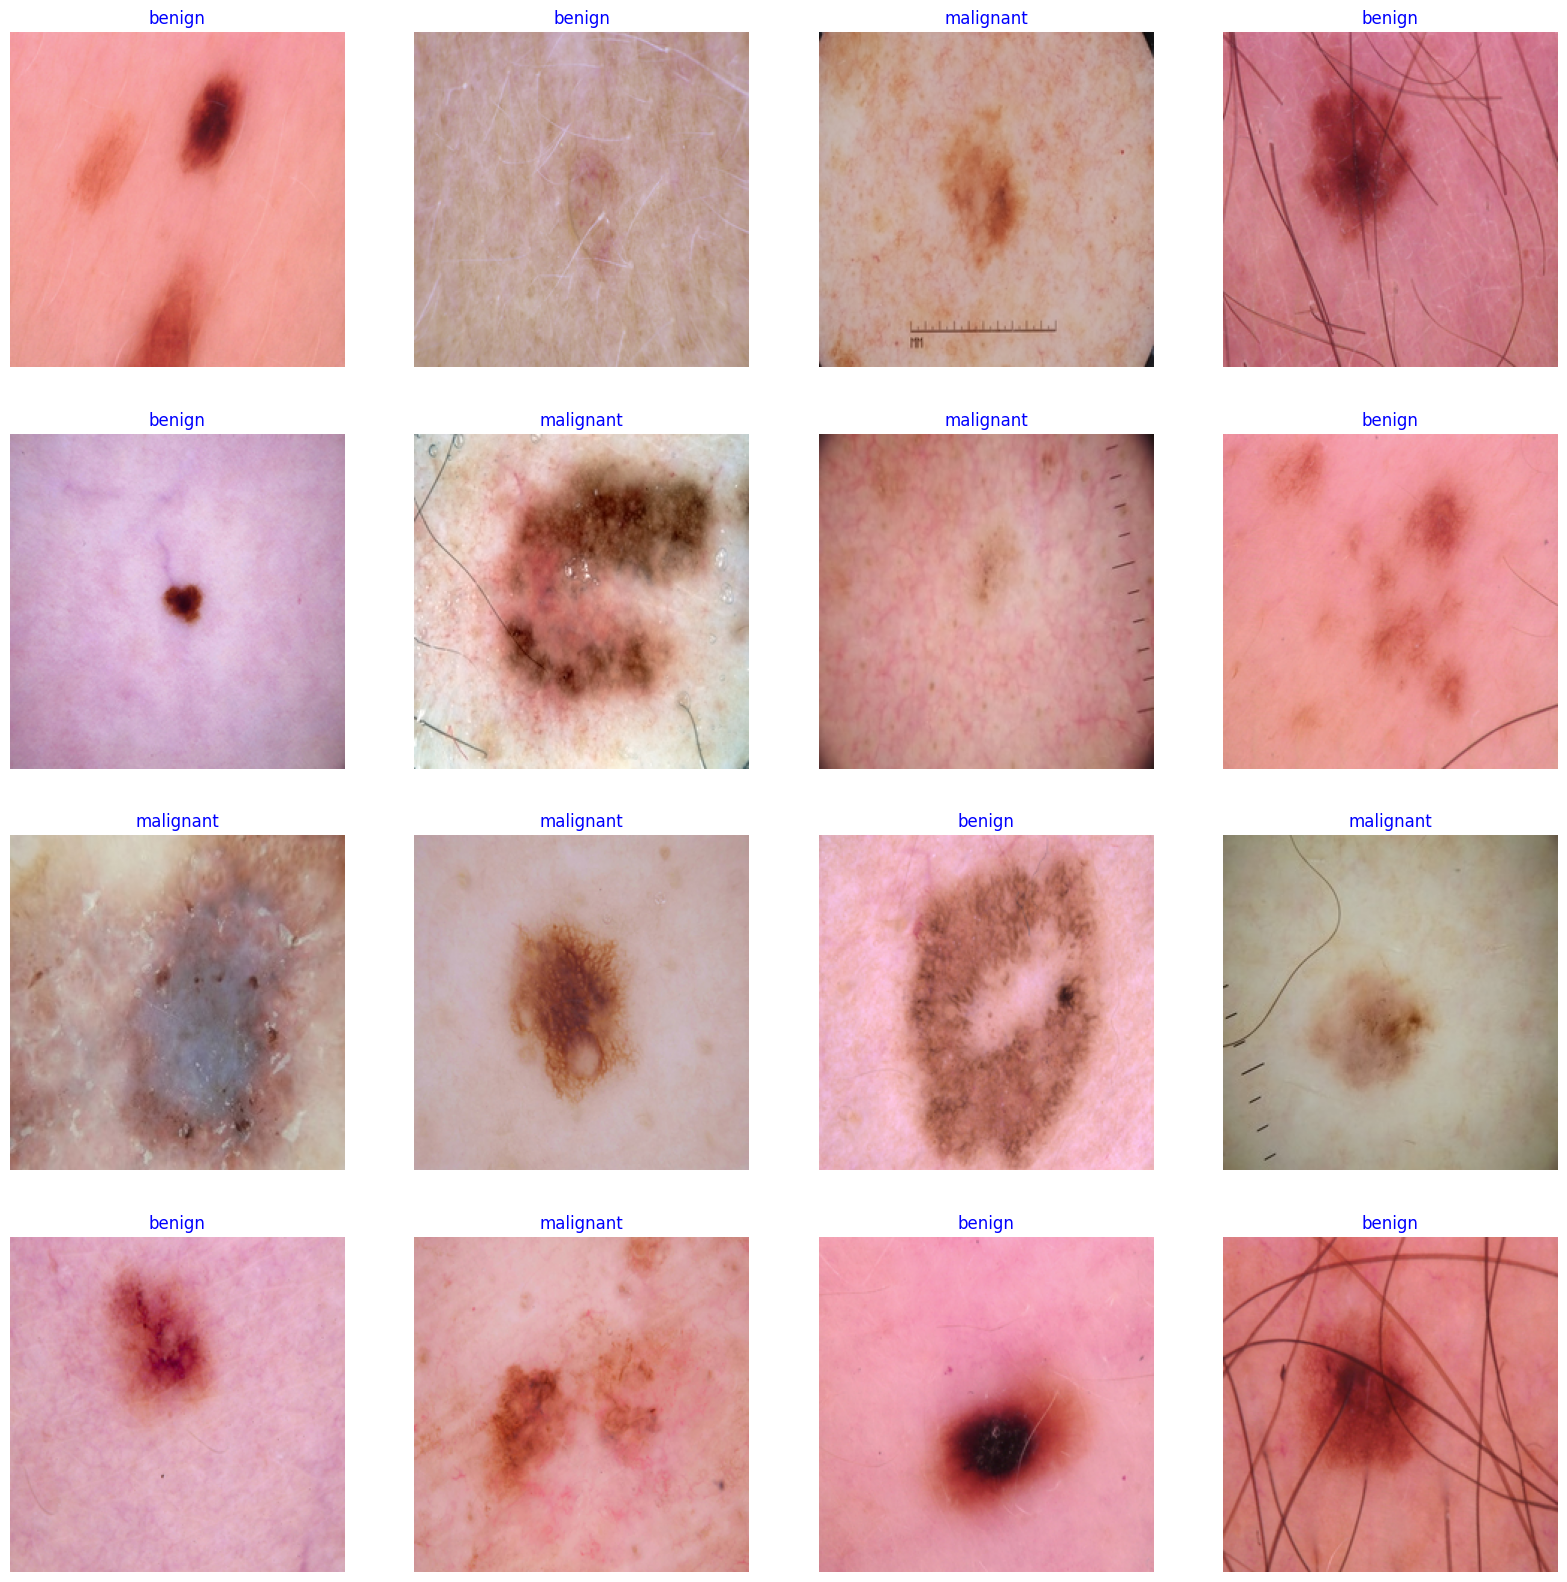

In [ ]:
# Get the class indices from the training generator
g_dict = train_gen.class_indices  # defines dictionary {'class': index}

# Extract class names (strings) from the dictionary keys
classes = list(g_dict.keys())  # defines list of dictionary's keys (classes), class names as strings

# Get a batch of samples from the training generator
images, labels = next(train_gen)

# Plot the images along with their corresponding class names
plt.figure(figsize=(20, 20))

# Loop through the batch of images
for i in range(16):
    plt.subplot(4, 4, i + 1)

    # Scale the image data to the range (0 - 255)
    image = images[i] / 255

    # Display the image
    plt.imshow(image)

    # Get the index of the maximum value in the labels array (one-hot encoded)
    index = np.argmax(labels[i])

    # Get the class name corresponding to the index
    class_name = classes[index]

    # Set the title of the subplot with the class name
    plt.title(class_name, color='blue', fontsize=12)

    # Turn off axis labels for better visualization
    plt.axis('off')

# Show the plot
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Input Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Fully Connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(2, activation='sigmoid'))

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      2

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',               # Adam optimizer for gradient descent
    loss='binary_crossentropy',    # Binary crossentropy loss for binary classification
    metrics=['accuracy']            # Evaluate performance using accuracy metric
)


In [ ]:
# Train the model
history1 = model.fit(
    train_gen,                      # Training data generator
    validation_data=test_gen,       # Validation data generator
    batch_size=64,                  # Number of samples in each batch
    epochs=10                        # Number of training epochs
)


Epoch 1/10
165/165 [==============================] - 739s 4s/step - loss: 0.5458 - accuracy: 0.7855 - val_loss: 0.6642 - val_accuracy: 0.7091
Epoch 2/10
165/165 [==============================] - 554s 3s/step - loss: 0.4337 - accuracy: 0.7950 - val_loss: 0.4124 - val_accuracy: 0.7985
Epoch 3/10
165/165 [==============================] - 553s 3s/step - loss: 0.4028 - accuracy: 0.8143 - val_loss: 0.3734 - val_accuracy: 0.8182
Epoch 4/10
165/165 [==============================] - 542s 3s/step - loss: 0.3858 - accuracy: 0.8143 - val_loss: 2.1689 - val_accuracy: 0.5530
Epoch 5/10
165/165 [==============================] - 557s 3s/step - loss: 0.3676 - accuracy: 0.8325 - val_loss: 0.6284 - val_accuracy: 0.7924
Epoch 6/10
165/165 [==============================] - 558s 3s/step - loss: 0.3852 - accuracy: 0.8215 - val_loss: 0.3838 - val_accuracy: 0.8212
Epoch 7/10
165/165 [==============================] - 555s 3s/step - loss: 0.3719 - accuracy: 0.8246 - val_loss: 0.8559 - val_accuracy: 0.6894

In [ ]:
# Create a DataFrame from the training history
error = pd.DataFrame(history1.history)

# Set up the plot
plt.figure(figsize=(18, 5), dpi=200)
sns.set_style('darkgrid')

# Plot Cross Entropy Loss
plt.subplot(121)
plt.title('Cross Entropy Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.plot(error['loss'], label='Training Loss')
plt.plot(error['val_loss'], label='Validation Loss')
plt.legend()

# Plot Classification Accuracy
plt.subplot(122)
plt.title('Classification Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(error['accuracy'], label='Training Accuracy')
plt.plot(error['val_accuracy'], label='Validation Accuracy')
plt.legend()

# Show the plots
plt.show()


In [ ]:
# Evaluate the model on the training generator
loss_train, acc_train = model.evaluate(train_gen)

# Print the accuracy and loss for training data
print('The accuracy of the model for training data is:', acc_train * 100)
print('The Loss of the model for training data is:', loss_train)

# Evaluate the model on the validation generator
loss_val, acc_val = model.evaluate(test_gen)

# Print the accuracy and loss for validation data
print('The accuracy of the model for validation data is:', acc_val * 100)
print('The Loss of the model for validation data is:', loss_val)


165/165 [==============================] - 133s 806ms/step - loss: 0.2795 - accuracy: 0.8761
The accuracy of the model for training data is: 87.60894536972046
The Loss of the model for training data is: 0.27946504950523376
42/42 [==============================] - 34s 814ms/step - loss: 0.3781 - accuracy: 0.8167
The accuracy of the model for validation data is: 81.66666626930237
The Loss of the model for validation data is: 0.37808847427368164


In [ ]:
# Make predictions on the test generator
result = model.predict(test_gen)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(result, axis=1)

# Get the true class labels from the test generator
y_true = test_gen.labels

# Evaluate the model on the test generator
loss_test, acc_test = model.evaluate(test_gen)

# Print the accuracy and loss for testing data
print('The accuracy of the model for testing data is:', acc_test * 100)
print('The Loss of the model for testing data is:', loss_test)


42/42 [==============================] - 34s 805ms/step - loss: 0.3781 - accuracy: 0.8167
The accuracy of the model for testing data is: 81.66666626930237
The Loss of the model for testing data is: 0.37808847427368164


In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=classes)

# Print the classification report
print(report)


              precision    recall  f1-score   support

      benign       0.85      0.81      0.83       360
   malignant       0.78      0.82      0.80       300

    accuracy                           0.82       660
   macro avg       0.82      0.82      0.82       660
weighted avg       0.82      0.82      0.82       660



In [ ]:
# Set the directory path where the training data is located
train_data_dir = '/content/drive/MyDrive/artificial_intelligence_dataset/train'

# Initialize empty lists to store file paths and corresponding labels
filepaths = []
labels = []

# List all folders (labels) in the specified directory
folds = os.listdir(train_data_dir)

# Iterate through each folder (label) in the directory
for fold in folds:
    # Construct the full path for the current folder
    foldpath = os.path.join(train_data_dir, fold)

    # List all files in the current folder
    filelist = os.listdir(foldpath)

    # Iterate through each file in the folder
    for file in filelist:
        # Construct the full file path
        fpath = os.path.join(foldpath, file)

        # Append the file path and label to the respective lists
        filepaths.append(fpath)
        labels.append(fold)

# Create Pandas Series for file paths and labels
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')

# Concatenate the two Series into a single DataFrame
train_df = pd.concat([Fseries, Lseries], axis=1)

# Display the first few rows of the dataframe
train_df.head()


filepaths  labels
0  /content/drive/MyDrive/artificial_intelligence...  benign
1  /content/drive/MyDrive/artificial_intelligence...  benign
2  /content/drive/MyDrive/artificial_intelligence...  benign
3  /content/drive/MyDrive/artificial_intelligence...  benign
4  /content/drive/MyDrive/artificial_intelligence...  benign

In [ ]:
# Set the directory path where the testing data is located
test_data_dir = '/content/drive/MyDrive/artificial_intelligence_dataset/test'

# Initialize empty lists to store file paths and corresponding labels
filepaths = []
labels = []

# List all folders (labels) in the specified testing data directory
folds = os.listdir(test_data_dir)

# Iterate through each folder (label) in the testing data directory
for fold in folds:
    # Construct the full path for the current folder in the test set
    foldpath = os.path.join(test_data_dir, fold)

    # List all files in the current folder in the test set
    filelist = os.listdir(foldpath)

    # Iterate through each file in the folder
    for file in filelist:
        # Construct the full file path
        fpath = os.path.join(foldpath, file)

        # Append the file path and label to the respective lists
        filepaths.append(fpath)
        labels.append(fold)

# Create Pandas Series for file paths and labels for the test set
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')

# Concatenate the two Series into a single DataFrame for the test set
test_df = pd.concat([Fseries, Lseries], axis=1)

# Display the first few rows of the dataframe
test_df.head()


filepaths     labels
0  /content/drive/MyDrive/artificial_intelligence...  malignant
1  /content/drive/MyDrive/artificial_intelligence...  malignant
2  /content/drive/MyDrive/artificial_intelligence...  malignant
3  /content/drive/MyDrive/artificial_intelligence...  malignant
4  /content/drive/MyDrive/artificial_intelligence...  malignant

In [ ]:
# Set the directory path where the testing data is located
test_data_dir = '/content/drive/MyDrive/artificial_intelligence_dataset/test'

# Initialize empty lists to store file paths and corresponding labels
filepaths = []
labels = []

# List all folders (labels) in the specified testing data directory
folds = os.listdir(test_data_dir)

# Iterate through each folder (label) in the testing data directory
for fold in folds:
    # Construct the full path for the current folder in the test set
    foldpath = os.path.join(test_data_dir, fold)

    # List all files in the current folder in the test set
    filelist = os.listdir(foldpath)

    # Iterate through each file in the folder
    for file in filelist:
        # Construct the full file path
        fpath = os.path.join(foldpath, file)

        # Append the file path and label to the respective lists
        filepaths.append(fpath)
        labels.append(fold)

# Create Pandas Series for file paths and labels for the test set
Fseries = pd.Series(filepaths, name='filepaths')
Lseries = pd.Series(labels, name='labels')

# Concatenate the two Series into a single DataFrame for the test set
test_df = pd.concat([Fseries, Lseries], axis=1)

# Display the first few rows of the dataframe
test_df.head()


filepaths     labels
0  /content/drive/MyDrive/artificial_intelligence...  malignant
1  /content/drive/MyDrive/artificial_intelligence...  malignant
2  /content/drive/MyDrive/artificial_intelligence...  malignant
3  /content/drive/MyDrive/artificial_intelligence...  malignant
4  /content/drive/MyDrive/artificial_intelligence...  malignant

In [ ]:
# Data preprocessing and visualization
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels',
                                       target_size=img_size, class_mode='categorical',
                                       color_mode='rgb', shuffle=True, batch_size=batch_size)

test_gen = ts_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels',
                                      target_size=img_size, class_mode='categorical',
                                      color_mode='rgb', shuffle=False, batch_size=batch_size)

g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize=(20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='blue', fontsize=12)
    plt.axis('off')

plt.show()


Found 2639 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.
